In [1]:
# loading packages

import os

import pandas as pd
import numpy as np

# plotting packages
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as clrs

# Kmeans algorithm from scikit-learn
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

from sklearn.cluster import AgglomerativeClustering


## Load raw data

In [2]:
# load raw data
DATA_FOLDER = './'
raw = pd.read_csv(os.path.join(DATA_FOLDER, 'country risk 2019 data.csv'))

# check the raw data
print("Size of the dataset (row, col): ", raw.shape)
print("\nFirst 5 rows\n", raw.head(n=5))

Size of the dataset (row, col):  (121, 6)

First 5 rows
      Country Abbrev  Corruption  Peace  Legal  GDP Growth
0    Albania     AL          35  1.821  4.546       2.983
1    Algeria     DZ          35  2.219  4.435       2.553
2  Argentina     AR          45  1.989  5.087      -3.061
3    Armenia     AM          42  2.294  4.812       6.000
4  Australia     AU          77  1.419  8.363       1.713


## Simple exploratory analysis
### Print summary statistics
Note that all features have quite different variances, and Corruption and Legal are highly correlated.

In [3]:
# print summary statistics
print("\nSummary statistics\n", raw.describe())
print("\nCorrelation matrix\n", raw.corr())


Summary statistics
        Corruption       Peace       Legal  GDP Growth
count  121.000000  121.000000  121.000000  121.000000
mean    46.842975    2.001017    5.752529    2.657529
std     18.702499    0.461485    1.373932    2.563741
min     15.000000    1.072000    2.671000   -9.459000
25%     33.000000    1.699000    4.785000    1.249000
50%     41.000000    1.939000    5.455000    2.600000
75%     60.000000    2.294000    6.488000    4.000000
max     87.000000    3.369000    8.712000    7.800000

Correlation matrix
             Corruption     Peace     Legal  GDP Growth
Corruption    1.000000 -0.705002  0.938512   -0.123545
Peace        -0.705002  1.000000 -0.662233   -0.004428
Legal         0.938512 -0.662233  1.000000   -0.150369
GDP Growth   -0.123545 -0.004428 -0.150369    1.000000


C:\Users\natha\AppData\Local\Temp\ipykernel_15080\3736554490.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print("\nCorrelation matrix\n", raw.corr())


### Plot histogram

Note that distributions for GDP Growth is quite skewed.

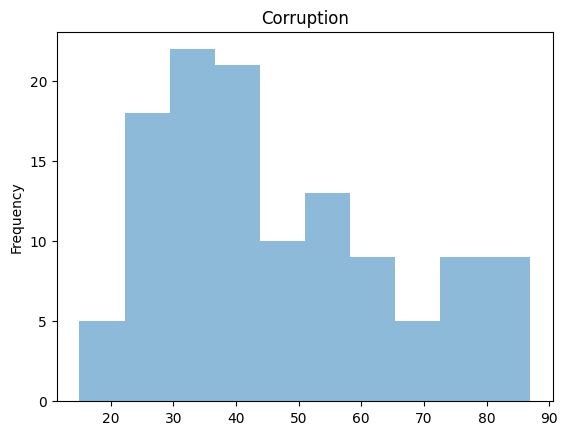

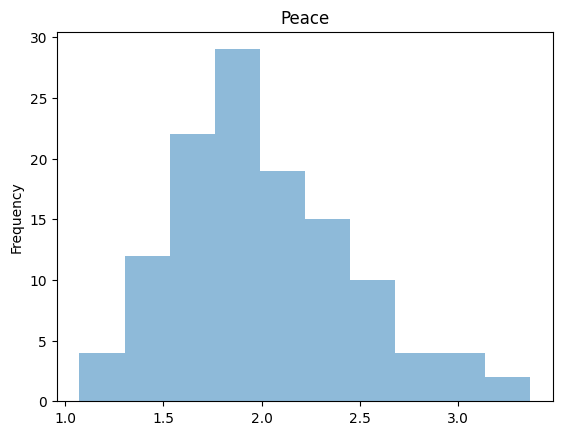

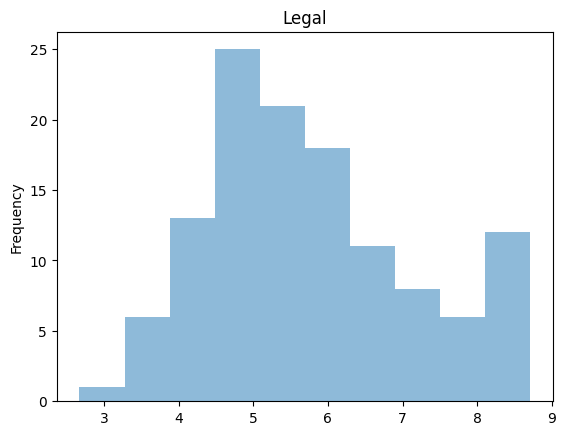

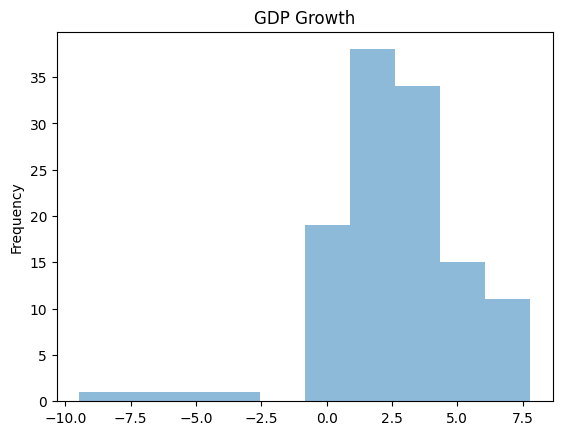

In [4]:
# plot histograms
plt.figure(1)
raw['Corruption'].plot(kind = 'hist', title = 'Corruption', alpha = 0.5)

plt.figure(2)
raw['Peace'].plot(kind = 'hist', title = 'Peace', alpha = 0.5)

plt.figure(3)
raw['Legal'].plot(kind = 'hist', title = 'Legal', alpha = 0.5)

plt.figure(4)
raw['GDP Growth'].plot(kind = 'hist', title = 'GDP Growth', alpha = 0.5)

plt.show()

## K means cluster
### Pick features & normalization

Since Corruption and Legal are highly correlated, we drop the Courrption variable, i.e., we pick three features for this analysis, Peace, Legal and GDP Grwoth. Let's normalize all the features, effectively making them equally weighted.

Ref. [Feature normalization.](https://stats.stackexchange.com/questions/21222/are-mean-normalization-and-feature-scaling-needed-for-k-means-clustering)

In [5]:
X = raw[['Peace', 'Legal', 'GDP Growth']]
X = (X - X.mean()) / X.std()
print(X.head(5))

      Peace     Legal  GDP Growth
0 -0.390081 -0.878158    0.126952
1  0.472352 -0.958948   -0.040772
2 -0.026039 -0.484397   -2.230541
3  0.634871 -0.684553    1.303747
4 -1.261182  1.900001   -0.368418


### Perform elbow method

The marginal gain of adding one cluster dropped quite a bit from k=3 to k=4. We will choose k=3 (not a clear cut though).

Ref. [Determining the number of clusters in a dataset.](https://en.wikipedia.org/wiki/Determining_the_number_of_clusters_in_a_data_set)

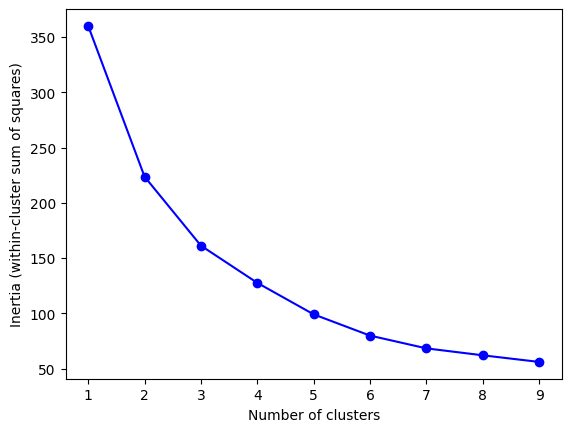

In [6]:
# https://stackoverflow.com/questions/41540751/sklearn-kmeans-equivalent-of-elbow-method

Ks = range(1, 10)
inertia = [KMeans(i).fit(X).inertia_ for i in Ks]

fig = plt.figure()
plt.plot(Ks, inertia, '-bo')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia (within-cluster sum of squares)')
plt.show()

### K means with k=3

In [7]:
k = 3
kmeans = KMeans(n_clusters=k, n_init = 10, random_state=1)
kmeans.fit(X)

# print inertia & cluster center
print("inertia for k=3 is", kmeans.inertia_)
print("cluster centers: ", kmeans.cluster_centers_)

# take a quick look at the result
y = kmeans.labels_
print("cluster labels: ", y)

inertia for k=3 is 161.13338710052554
cluster centers:  [[ 1.22506036 -0.83385901 -1.07842464]
 [-0.85097477  1.02149992 -0.23897931]
 [ 0.23006626 -0.54045468  0.65506397]]
cluster labels:  [2 2 0 2 1 1 2 2 2 1 2 2 2 1 0 2 0 2 1 0 1 2 2 1 2 1 1 0 1 2 0 2 2 1 2 1 1
 2 2 1 2 2 2 2 1 1 2 2 0 1 2 1 1 1 1 2 2 1 1 1 0 0 1 2 2 1 2 2 1 0 2 2 2 2
 2 1 1 0 0 1 1 0 2 0 2 2 1 1 1 1 0 2 0 2 2 2 1 1 1 0 1 2 1 1 1 2 2 2 0 2 0
 2 0 1 1 1 1 2 0 2 0]


n_init = 2


In [8]:
k = 3
kmeans = KMeans(n_clusters=k, n_init = 2, random_state=1)
kmeans.fit(X)

# print inertia & cluster center
print("inertia for k=3 is", kmeans.inertia_)
print("cluster centers: ", kmeans.cluster_centers_)

# take a quick look at the result
y = kmeans.labels_
print("cluster labels: ", y)

result = pd.DataFrame({'Country':raw['Country'], 'Abbrev':raw['Abbrev'], 'Label':y})
print(result.loc[result['Label'] == 2]['Country'])


inertia for k=3 is 169.24242908631018
cluster centers:  [[ 0.53110654 -0.61456608  0.34774502]
 [-0.85103491  0.99692377 -0.22524313]
 [ 0.70529573 -0.95894794 -3.43893096]]
cluster labels:  [0 0 2 0 1 1 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 1 0 1 1 0 1 0 0 0 0 1 0 1 1
 0 0 1 0 0 0 0 1 1 0 0 2 1 0 1 1 1 1 0 0 1 1 1 0 0 1 0 0 1 0 0 1 0 0 0 0 0
 0 1 1 2 0 1 1 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 1 1 1 0 1 0 1 1 1 0 0 0 0 0 0
 0 0 1 1 1 1 0 0 0 2]
2      Argentina
48          Iran
77     Nicaragua
120     Zimbabwe
Name: Country, dtype: object


n_init = 20


In [9]:
k = 3
kmeans = KMeans(n_clusters=k, n_init = 20, random_state=1)
kmeans.fit(X)

# print inertia & cluster center
print("inertia for k=3 is", kmeans.inertia_)
print("cluster centers: ", kmeans.cluster_centers_)

# take a quick look at the result
y = kmeans.labels_
print("cluster labels: ", y)

result = pd.DataFrame({'Country':raw['Country'], 'Abbrev':raw['Abbrev'], 'Label':y})
print(result.loc[result['Label'] == 2]['Country'])


inertia for k=3 is 161.13338710052554
cluster centers:  [[ 1.22506036 -0.83385901 -1.07842464]
 [-0.85097477  1.02149992 -0.23897931]
 [ 0.23006626 -0.54045468  0.65506397]]
cluster labels:  [2 2 0 2 1 1 2 2 2 1 2 2 2 1 0 2 0 2 1 0 1 2 2 1 2 1 1 0 1 2 0 2 2 1 2 1 1
 2 2 1 2 2 2 2 1 1 2 2 0 1 2 1 1 1 1 2 2 1 1 1 0 0 1 2 2 1 2 2 1 0 2 2 2 2
 2 1 1 0 0 1 1 0 2 0 2 2 1 1 1 1 0 2 0 2 2 2 1 1 1 0 1 2 1 1 1 2 2 2 0 2 0
 2 0 1 1 1 1 2 0 2 0]
0                     Albania
1                     Algeria
3                     Armenia
6                  Azerbaijan
7                     Bahrain
8                  Bangladesh
10                      Benin
11                    Bolivia
12     Bosnia and Herzegovina
15                   Bulgaria
17                   Cameroon
21                      China
22                   Colombia
24                    Croatia
29         Dominican Republic
31                      Egypt
32                El Salvador
34                   Ethiopia
37                    

n_init = 50

In [10]:
k = 3
kmeans = KMeans(n_clusters=k, n_init = 50, random_state=1)
kmeans.fit(X)

# print inertia & cluster center
print("inertia for k=3 is", kmeans.inertia_)
print("cluster centers: ", kmeans.cluster_centers_)

# take a quick look at the result
y = kmeans.labels_
print("cluster labels: ", y)

result = pd.DataFrame({'Country':raw['Country'], 'Abbrev':raw['Abbrev'], 'Label':y})
print(result.loc[result['Label'] == 0]['Country'])


inertia for k=3 is 161.13338710052554
cluster centers:  [[ 1.22506036 -0.83385901 -1.07842464]
 [-0.85097477  1.02149992 -0.23897931]
 [ 0.23006626 -0.54045468  0.65506397]]
cluster labels:  [2 2 0 2 1 1 2 2 2 1 2 2 2 1 0 2 0 2 1 0 1 2 2 1 2 1 1 0 1 2 0 2 2 1 2 1 1
 2 2 1 2 2 2 2 1 1 2 2 0 1 2 1 1 1 1 2 2 1 1 1 0 0 1 2 2 1 2 2 1 0 2 2 2 2
 2 1 1 0 0 1 1 0 2 0 2 2 1 1 1 1 0 2 0 2 2 2 1 1 1 0 1 2 1 1 1 2 2 2 0 2 0
 2 0 1 1 1 1 2 0 2 0]
2                         Argentina
14                           Brazil
16                          Burundi
19                             Chad
27     Democratic Republic of Congo
30                          Ecuador
48                             Iran
60                          Lebanon
61                          Liberia
69                           Mexico
77                        Nicaragua
78                          Nigeria
81                         Pakistan
83                         Paraguay
90                           Russia
92                    

n_init = 100

In [11]:
k = 3
kmeans = KMeans(n_clusters=k, n_init = 100, random_state=1)
kmeans.fit(X)

# print inertia & cluster center
print("inertia for k=3 is", kmeans.inertia_)
print("cluster centers: ", kmeans.cluster_centers_)

# take a quick look at the result
y = kmeans.labels_
print("cluster labels: ", y)

result = pd.DataFrame({'Country':raw['Country'], 'Abbrev':raw['Abbrev'], 'Label':y})
print(result.loc[result['Label'] == 0]['Country'])


inertia for k=3 is 161.13338710052554
cluster centers:  [[ 1.22506036 -0.83385901 -1.07842464]
 [-0.85097477  1.02149992 -0.23897931]
 [ 0.23006626 -0.54045468  0.65506397]]
cluster labels:  [2 2 0 2 1 1 2 2 2 1 2 2 2 1 0 2 0 2 1 0 1 2 2 1 2 1 1 0 1 2 0 2 2 1 2 1 1
 2 2 1 2 2 2 2 1 1 2 2 0 1 2 1 1 1 1 2 2 1 1 1 0 0 1 2 2 1 2 2 1 0 2 2 2 2
 2 1 1 0 0 1 1 0 2 0 2 2 1 1 1 1 0 2 0 2 2 2 1 1 1 0 1 2 1 1 1 2 2 2 0 2 0
 2 0 1 1 1 1 2 0 2 0]
2                         Argentina
14                           Brazil
16                          Burundi
19                             Chad
27     Democratic Republic of Congo
30                          Ecuador
48                             Iran
60                          Lebanon
61                          Liberia
69                           Mexico
77                        Nicaragua
78                          Nigeria
81                         Pakistan
83                         Paraguay
90                           Russia
92                    

n_init = 200

In [12]:
k = 3
kmeans = KMeans(n_clusters=k, n_init = 200, random_state=1)
kmeans.fit(X)

# print inertia & cluster center
print("inertia for k=3 is", kmeans.inertia_)
print("cluster centers: ", kmeans.cluster_centers_)

# take a quick look at the result
y = kmeans.labels_
print("cluster labels: ", y)

result = pd.DataFrame({'Country':raw['Country'], 'Abbrev':raw['Abbrev'], 'Label':y})
print(result.loc[result['Label'] == 0]['Country'])


inertia for k=3 is 161.13338710052554
cluster centers:  [[ 1.22506036 -0.83385901 -1.07842464]
 [-0.85097477  1.02149992 -0.23897931]
 [ 0.23006626 -0.54045468  0.65506397]]
cluster labels:  [2 2 0 2 1 1 2 2 2 1 2 2 2 1 0 2 0 2 1 0 1 2 2 1 2 1 1 0 1 2 0 2 2 1 2 1 1
 2 2 1 2 2 2 2 1 1 2 2 0 1 2 1 1 1 1 2 2 1 1 1 0 0 1 2 2 1 2 2 1 0 2 2 2 2
 2 1 1 0 0 1 1 0 2 0 2 2 1 1 1 1 0 2 0 2 2 2 1 1 1 0 1 2 1 1 1 2 2 2 0 2 0
 2 0 1 1 1 1 2 0 2 0]
2                         Argentina
14                           Brazil
16                          Burundi
19                             Chad
27     Democratic Republic of Congo
30                          Ecuador
48                             Iran
60                          Lebanon
61                          Liberia
69                           Mexico
77                        Nicaragua
78                          Nigeria
81                         Pakistan
83                         Paraguay
90                           Russia
92                    

### Visualize the result (3D plot)

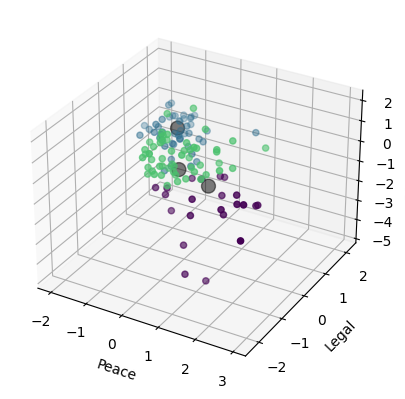

In [13]:
# set up the color
norm = clrs.Normalize(vmin=0.,vmax=y.max() + 0.8)
cmap = cm.viridis

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X.iloc[:,0], X.iloc[:,1], X.iloc[:,2], c=cmap(norm(y)), marker='o')

centers = kmeans.cluster_centers_
ax.scatter(centers[:, 0], centers[:, 1], c='black', s=100, alpha=0.5)

ax.set_xlabel('Peace')
ax.set_ylabel('Legal')
ax.set_zlabel('GDP Growth')

plt.show()

### Visualize the result (3 2D plots)

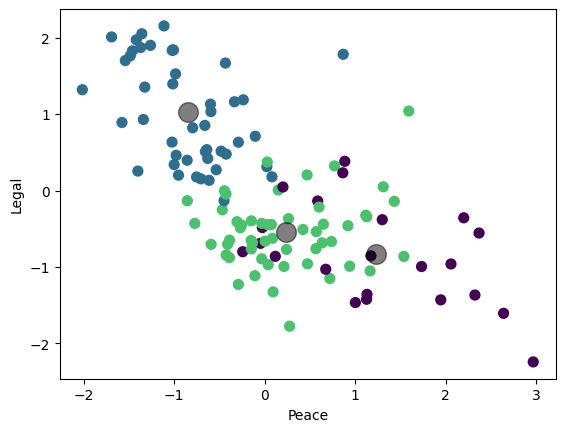

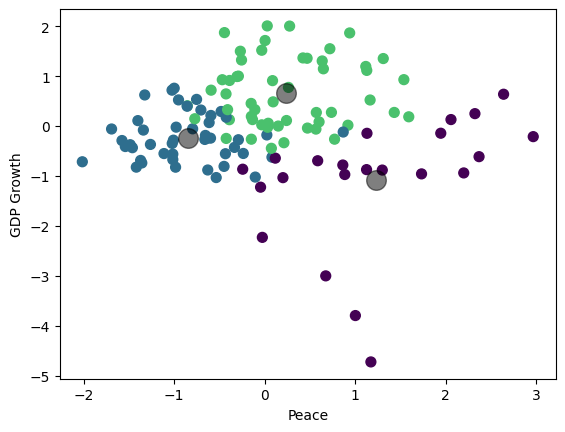

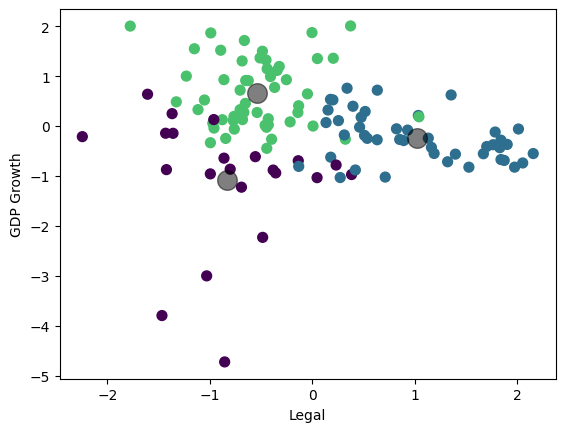

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt

figs = [(0, 1), (0, 2), (1, 2)]
labels = ['Peace', 'Legal', 'GDP Growth']

for i in range(3):
    fig = plt.figure(i)
    plt.scatter(X.iloc[:,figs[i][0]], X.iloc[:,figs[i][1]], c=cmap(norm(y)), s=50)
    plt.scatter(centers[:, figs[i][0]], centers[:, figs[i][1]], c='black', s=200, alpha=0.5)
    plt.xlabel(labels[figs[i][0]])
    plt.ylabel(labels[figs[i][1]])

plt.show()

### Visualize the result (3 2D plots)
plot country abbreviations instead of dots.

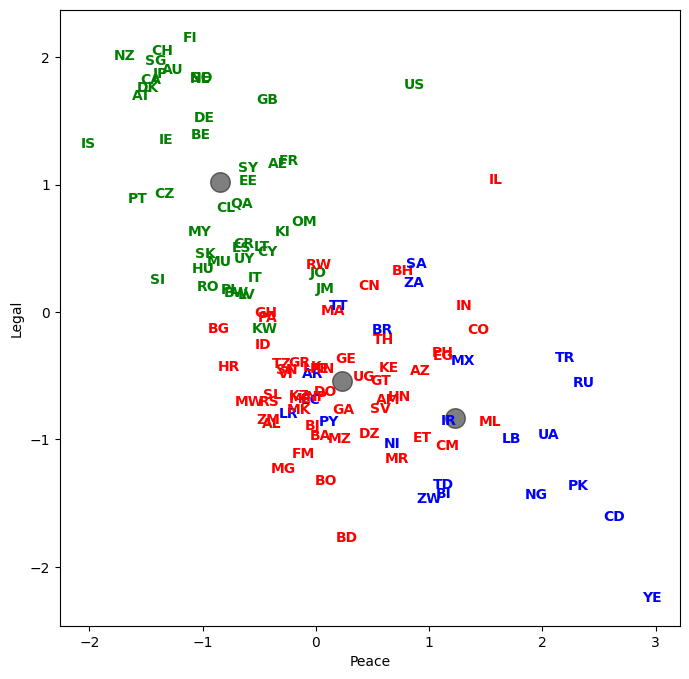

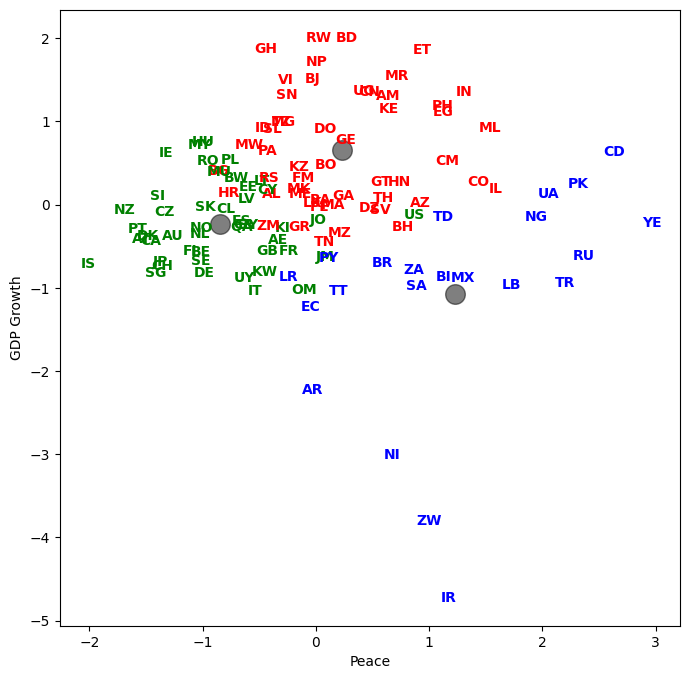

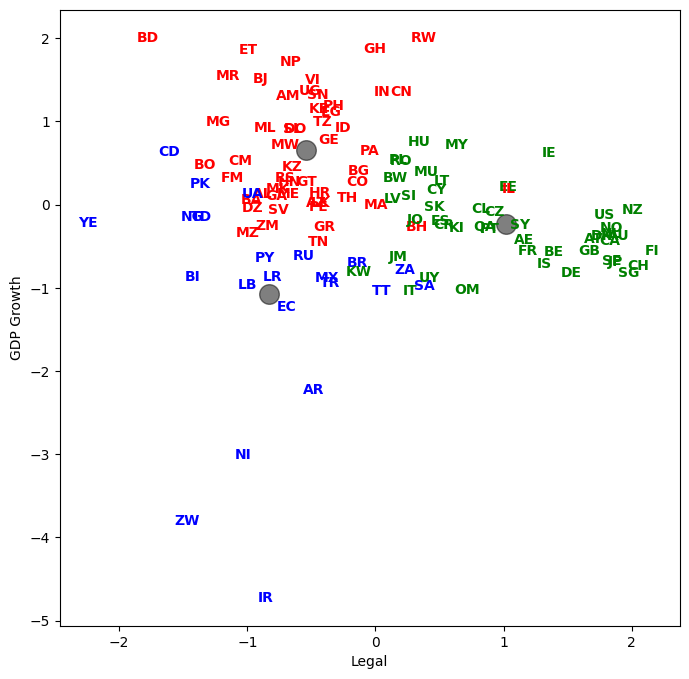

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt

figs = [(0, 1), (0, 2), (1, 2)]
labels = ['Peace', 'Legal', 'GDP Growth']
colors = ['blue','green', 'red']

for i in range(3):
    fig = plt.figure(i, figsize=(8, 8))
    x_1 = figs[i][0]
    x_2 = figs[i][1]
    plt.scatter(X.iloc[:, x_1], X.iloc[:, x_2], c=y, s=0, alpha=0)
    plt.scatter(centers[:, x_1], centers[:, x_2], c='black', s=200, alpha=0.5)
    for j in range(X.shape[0]):
        plt.text(X.iloc[j, x_1], X.iloc[j, x_2], raw['Abbrev'].iloc[j], 
                 color=colors[y[j]], weight='semibold', horizontalalignment = 'center', verticalalignment = 'center')
    plt.xlabel(labels[x_1])
    plt.ylabel(labels[x_2])

plt.show()

### List the result

In [16]:
result = pd.DataFrame({'Country':raw['Country'], 'Abbrev':raw['Abbrev'], 'Label':y})
with pd.option_context('display.max_rows', None, 'display.max_columns', 3):
    print(result.sort_values('Label'))


                          Country Abbrev  Label
60                        Lebanon     LB      0
30                        Ecuador     EC      0
48                           Iran     IR      0
61                        Liberia     LR      0
69                         Mexico     MX      0
77                      Nicaragua     NI      0
78                        Nigeria     NG      0
81                       Pakistan     PK      0
83                       Paraguay     PY      0
90                         Russia     RU      0
92                   Saudi Arabia     SA      0
99                   South Africa     ZA      0
108           Trinidad and Tobago     TT      0
110                        Turkey     TR      0
112                       Ukraine     UA      0
118                         Yemen     YE      0
27   Democratic Republic of Congo     CD      0
19                           Chad     TD      0
120                      Zimbabwe     ZW      0
14                         Brazil     BR

In [17]:
print(result.loc[result['Label'] == 0]['Country'])


2                         Argentina
14                           Brazil
16                          Burundi
19                             Chad
27     Democratic Republic of Congo
30                          Ecuador
48                             Iran
60                          Lebanon
61                          Liberia
69                           Mexico
77                        Nicaragua
78                          Nigeria
81                         Pakistan
83                         Paraguay
90                           Russia
92                     Saudi Arabia
99                     South Africa
108             Trinidad and Tobago
110                          Turkey
112                         Ukraine
118                           Yemen
120                        Zimbabwe
Name: Country, dtype: object


### Adding Corruption

In [18]:
X = raw[['Peace', 'Legal', 'GDP Growth', 'Corruption']]
X = (X - X.mean()) / X.std()
print(X.head(5))

k = 3
kmeans = KMeans(n_clusters=k, n_init = 10, random_state=1)
kmeans.fit(X)

# print inertia & cluster center
print("inertia for k=3 is", kmeans.inertia_)
print("cluster centers: ", kmeans.cluster_centers_)

# take a quick look at the result
y = kmeans.labels_
print("cluster labels: ", y)

      Peace     Legal  GDP Growth  Corruption
0 -0.390081 -0.878158    0.126952   -0.633230
1  0.472352 -0.958948   -0.040772   -0.633230
2 -0.026039 -0.484397   -2.230541   -0.098542
3  0.634871 -0.684553    1.303747   -0.258948
4 -1.261182  1.900001   -0.368418    1.612460
inertia for k=3 is 194.4046655009297
cluster centers:  [[-0.89877793  1.12417837 -0.26007806  1.17949284]
 [ 0.17066495 -0.47838646  0.5929059  -0.49863571]
 [ 1.22506036 -0.83385901 -1.07842464 -0.88356071]]
cluster labels:  [1 1 2 1 0 0 1 1 1 0 1 1 1 0 2 1 2 1 0 2 0 1 1 0 1 0 0 2 0 1 2 1 1 0 1 0 0
 1 1 0 1 1 1 1 1 0 1 1 2 0 1 0 1 0 1 1 1 0 1 0 2 2 0 1 1 0 1 1 0 2 1 1 1 1
 1 0 0 2 2 0 0 2 1 2 1 1 0 0 0 1 2 1 2 1 1 1 0 0 0 2 0 1 0 0 0 1 1 1 2 1 2
 1 2 0 0 0 0 1 2 1 2]


In [19]:
result = pd.DataFrame({'Country':raw['Country'], 'Abbrev':raw['Abbrev'], 'Label':y})
with pd.option_context('display.max_rows', None, 'display.max_columns', 3):
    print(result.sort_values('Label'))


                          Country Abbrev  Label
51                          Italy     IT      0
33                        Estonia     EE      0
35                        Finland     FI      0
36                         France     FR      0
39                        Germany     DE      0
45                        Iceland     IS      0
49                        Ireland     IE      0
53                          Japan     JP      0
57                  Korea (South)     KI      0
59                         Latvia     LV      0
62                      Lithuania     LT      0
65                       Malaysia     MY      0
68                      Mauritius     MU      0
75                    Netherlands     NL      0
76                    New Zealand     NZ      0
79                         Norway     NO      0
80                           Oman     OM      0
86                         Poland     PL      0
87                       Portugal     PT      0
88                          Qatar     QA

Reset to ['legal', 'GDP Growth', 'peace']

In [20]:
X = raw[['Peace', 'Legal', 'GDP Growth']]
X = (X - X.mean()) / X.std()
print(X.head(5))


      Peace     Legal  GDP Growth
0 -0.390081 -0.878158    0.126952
1  0.472352 -0.958948   -0.040772
2 -0.026039 -0.484397   -2.230541
3  0.634871 -0.684553    1.303747
4 -1.261182  1.900001   -0.368418


In [21]:
# Silhouette Analysis
range_n_clusters=[2,3,4,5,6,7,8,9,10]
for n_clusters in range_n_clusters:
    clusterer=KMeans(n_clusters=n_clusters, random_state=1)
    cluster_labels=clusterer.fit_predict(X)
    silhouette_avg=silhouette_score(X,cluster_labels)
    print("For n_clusters=", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

For n_clusters= 2 The average silhouette_score is : 0.350913952385216
For n_clusters= 3 The average silhouette_score is : 0.35585223343505057
For n_clusters= 4 The average silhouette_score is : 0.3372449209416129
For n_clusters= 5 The average silhouette_score is : 0.3443842097739338
For n_clusters= 6 The average silhouette_score is : 0.348753821229846
For n_clusters= 7 The average silhouette_score is : 0.3603542108728006
For n_clusters= 8 The average silhouette_score is : 0.3394917368960437
For n_clusters= 9 The average silhouette_score is : 0.3152647236003266
For n_clusters= 10 The average silhouette_score is : 0.30907965384250063


### Agglomerative Clustering

Ward

In [22]:
agglo = AgglomerativeClustering(n_clusters = 3, linkage = "ward")
agglo.fit(X)

# take a quick look at the result
y = agglo.labels_
print("cluster labels: ", y)
result = pd.DataFrame({'Country':raw['Country'], 'Abbrev':raw['Abbrev'], 'Label':y})
print(result.loc[result['Label'] == 2]['Country'])


cluster labels:  [0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 2 0 1 2 1 0 0 1 0 1 1 2 1 0 0 0 0 1 0 1 1
 0 0 1 0 0 0 0 1 1 0 0 2 1 0 0 0 1 0 0 0 1 0 0 2 0 1 0 0 1 0 0 0 2 0 0 0 0
 0 1 1 2 2 1 0 2 0 0 0 0 0 1 1 0 2 0 0 0 0 0 1 1 1 0 1 0 1 1 1 0 0 0 0 0 2
 0 2 1 1 0 0 0 2 0 2]
16                          Burundi
19                             Chad
27     Democratic Republic of Congo
48                             Iran
60                          Lebanon
69                           Mexico
77                        Nicaragua
78                          Nigeria
81                         Pakistan
90                           Russia
110                          Turkey
112                         Ukraine
118                           Yemen
120                        Zimbabwe
Name: Country, dtype: object


Average

In [23]:
agglo = AgglomerativeClustering(n_clusters = 3, linkage = "average")
agglo.fit(X)

# take a quick look at the result
y = agglo.labels_
print("cluster labels: ", y)
result = pd.DataFrame({'Country':raw['Country'], 'Abbrev':raw['Abbrev'], 'Label':y})
print(result.loc[result['Label'] == 1]['Country'])

cluster labels:  [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 2 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 2 0 0 0 0
 0 0 0 1 2 0 0 2 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2
 0 2 0 0 0 0 0 2 0 1]
2      Argentina
48          Iran
77     Nicaragua
120     Zimbabwe
Name: Country, dtype: object


Complete

In [24]:
agglo = AgglomerativeClustering(n_clusters = 3, linkage = "complete")
agglo.fit(X)

# take a quick look at the result
y = agglo.labels_
print("cluster labels: ", y)
result = pd.DataFrame({'Country':raw['Country'], 'Abbrev':raw['Abbrev'], 'Label':y})
print(result.loc[result['Label'] == 1]['Country'])

cluster labels:  [0 0 0 2 0 0 2 0 2 0 2 2 0 0 0 0 2 2 0 2 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 0 0
 0 2 0 0 0 2 2 0 0 2 0 1 0 0 0 0 0 0 0 2 0 0 0 2 0 0 2 0 0 2 2 0 2 2 0 0 0
 2 0 0 1 2 0 0 2 0 0 0 2 0 0 0 0 2 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 2
 2 2 0 0 0 0 2 2 0 1]
48          Iran
77     Nicaragua
120     Zimbabwe
Name: Country, dtype: object


Single

In [25]:
agglo = AgglomerativeClustering(n_clusters = 3, linkage = "single")
agglo.fit(X)

# take a quick look at the result
y = agglo.labels_
print("cluster labels: ", y)
result = pd.DataFrame({'Country':raw['Country'], 'Abbrev':raw['Abbrev'], 'Label':y})
print(result.loc[result['Label'] == 0]['Country'])

cluster labels:  [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 0 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 1 2 2 2 2 0]
48          Iran
77     Nicaragua
120     Zimbabwe
Name: Country, dtype: object


### Graphing Hierarchy Clustering

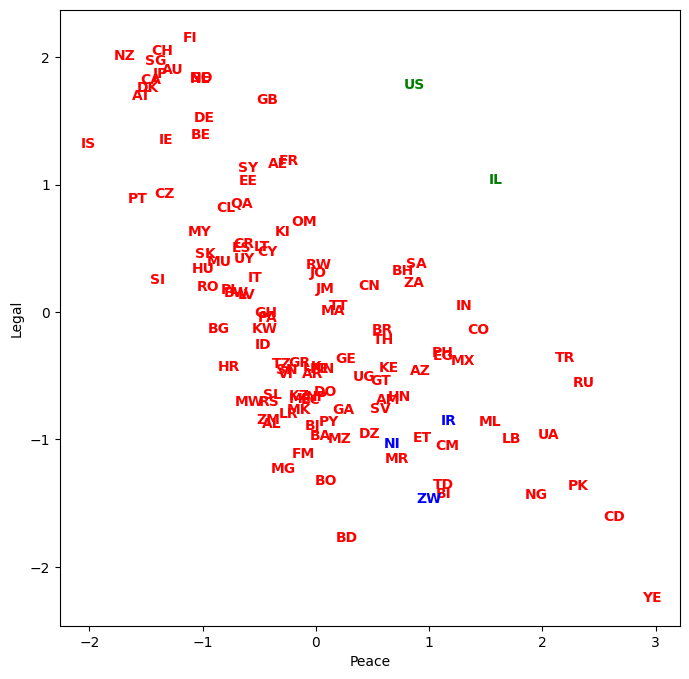

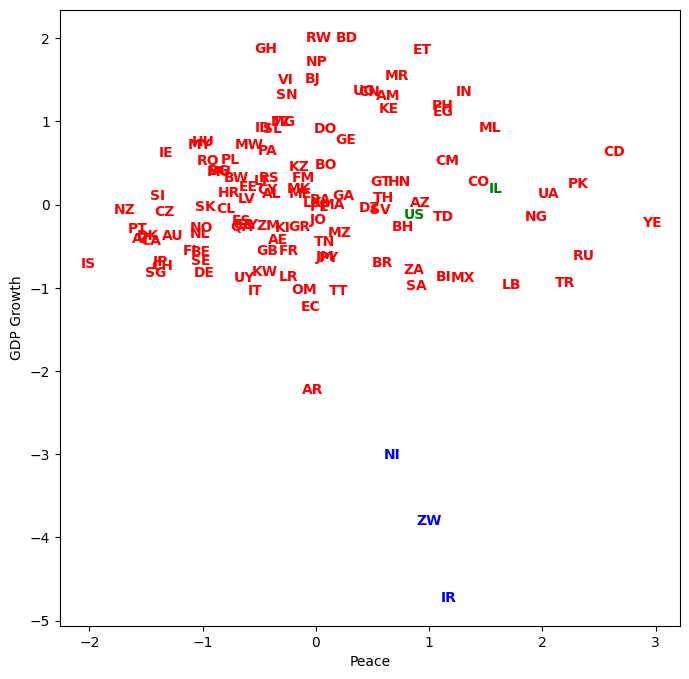

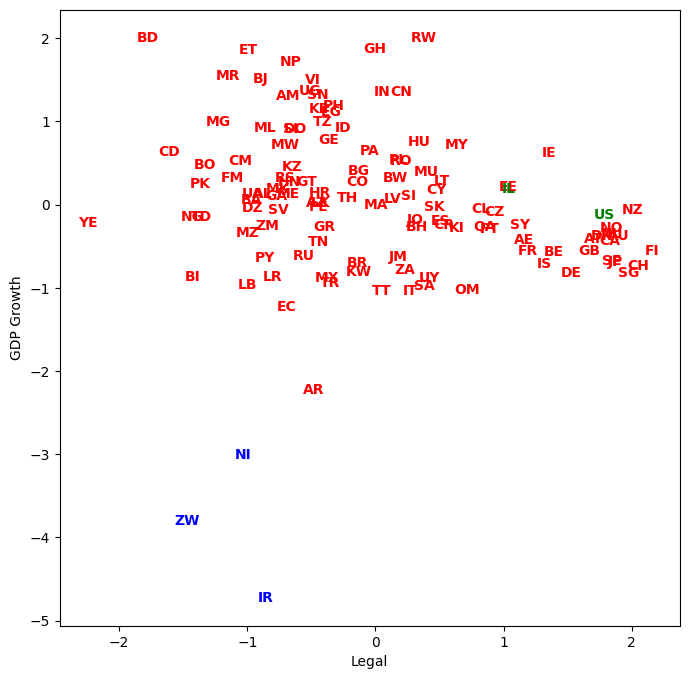

In [26]:
%matplotlib inline
import matplotlib.pyplot as plt

figs = [(0, 1), (0, 2), (1, 2)]
labels = ['Peace', 'Legal', 'GDP Growth']
colors = ['blue','green', 'red']

for i in range(3):
    fig = plt.figure(i, figsize=(8, 8))
    x_1 = figs[i][0]
    x_2 = figs[i][1]
    plt.scatter(X.iloc[:, x_1], X.iloc[:, x_2], c=y, s=0, alpha=0)
    for j in range(X.shape[0]):
        plt.text(X.iloc[j, x_1], X.iloc[j, x_2], raw['Abbrev'].iloc[j], 
                 color=colors[y[j]], weight='semibold', horizontalalignment = 'center', verticalalignment = 'center')
    plt.xlabel(labels[x_1])
    plt.ylabel(labels[x_2])

plt.show()

### Adding VZ

In [29]:
# load raw data
DATA_FOLDER = './'
raw = pd.read_csv(os.path.join(DATA_FOLDER, 'country risk 2019 vz data.csv'))

# check the raw data
print("Size of the dataset (row, col): ", raw.shape)
print("\nFirst 5 rows\n", raw.head(n=5))
XVZ = raw[['Peace', 'Legal', 'GDP Growth']]
XVZ = (XVZ - XVZ.mean()) / XVZ.std()
print(XVZ.head(5))

k = 3
kmeans = KMeans(n_clusters=k, n_init = 10, random_state=1)
kmeans.fit(X)

# print inertia & cluster center
print("inertia for k=3 is", kmeans.inertia_)
print("cluster centers: ", kmeans.cluster_centers_)

cent = kmeans.cluster_centers_

# take a quick look at the result
y = kmeans.labels_
print("cluster labels: ", y)

Size of the dataset (row, col):  (122, 6)

First 5 rows
      Country Abbrev  Corruption  Peace  Legal  GDP Growth
0    Albania     AL          35  1.821  4.546       2.983
1    Algeria     DZ          35  2.219  4.435       2.553
2  Argentina     AR          45  1.989  5.087      -3.061
3    Armenia     AM          42  2.294  4.812       6.000
4  Australia     AU          77  1.419  8.363       1.713
      Peace     Legal  GDP Growth
0 -0.400182 -0.849636    0.148881
1  0.458391 -0.929350    0.047927
2 -0.037769 -0.461122   -1.270112
3  0.620183 -0.658611    0.857204
4 -1.267384  1.891504   -0.149286
inertia for k=3 is 147.35815961158326
cluster centers:  [[ 0.50083526 -0.57899064  0.14262782]
 [ 1.4334541  -2.03528534 -8.76865913]
 [-0.9090402   1.05949011 -0.05031098]]
cluster labels:  [0 0 0 0 2 2 0 0 0 2 0 0 0 2 0 2 0 0 2 0 2 0 0 2 0 2 2 0 2 0 0 0 0 2 0 2 2
 0 0 2 0 0 0 0 2 2 0 0 0 2 0 2 0 2 0 0 0 2 0 2 0 0 2 0 0 2 0 0 2 0 0 0 0 0
 0 2 2 0 0 2 2 0 0 0 0 0 2 2 2 2 0 0 0 0 0 0 2 2 2

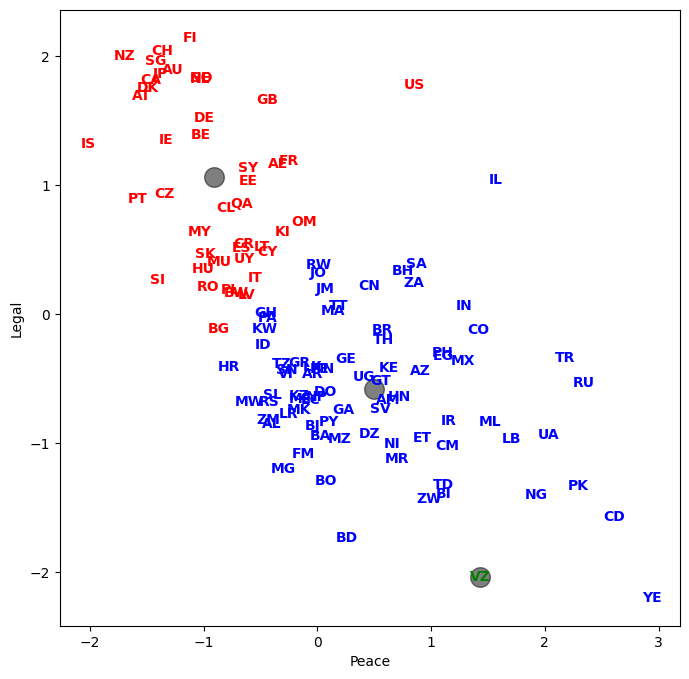

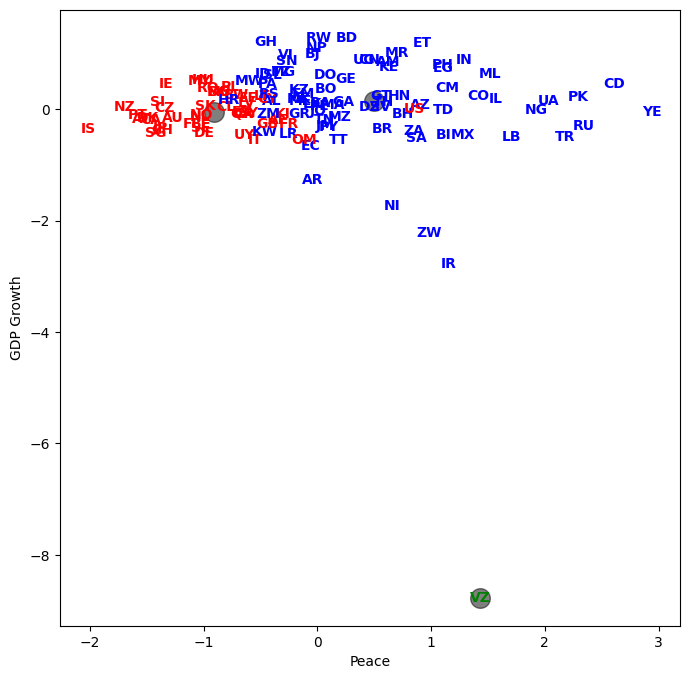

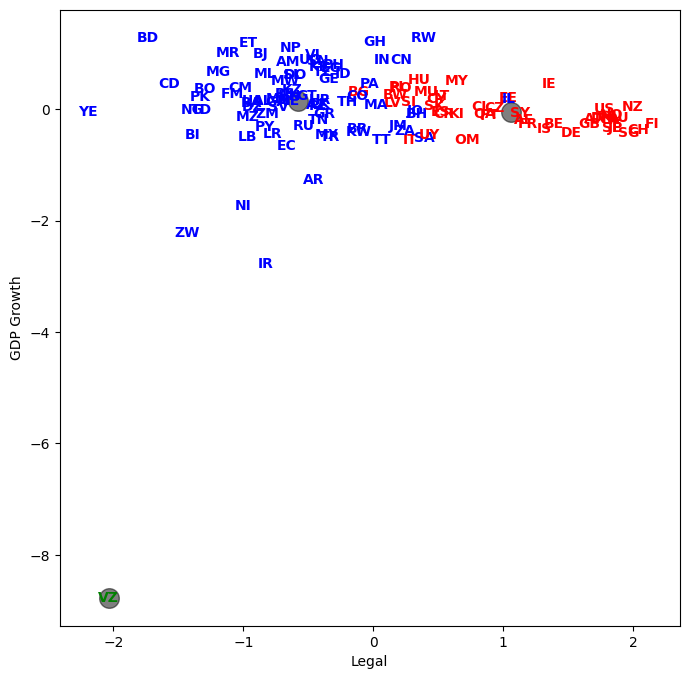

In [30]:
%matplotlib inline
import matplotlib.pyplot as plt

figs = [(0, 1), (0, 2), (1, 2)]
labels = ['Peace', 'Legal', 'GDP Growth']
colors = ['blue','green', 'red']

for i in range(3):
    fig = plt.figure(i, figsize=(8, 8))
    x_1 = figs[i][0]
    x_2 = figs[i][1]
    plt.scatter(XVZ.iloc[:, x_1], XVZ.iloc[:, x_2], c=y, s=0, alpha=0)
    plt.scatter(cent[:, x_1], cent[:, x_2], c='black', s=200, alpha=0.5)
    for j in range(XVZ.shape[0]):
        plt.text(XVZ.iloc[j, x_1], XVZ.iloc[j, x_2], raw['Abbrev'].iloc[j], 
                 color=colors[y[j]], weight='semibold', horizontalalignment = 'center', verticalalignment = 'center')
    plt.xlabel(labels[x_1])
    plt.ylabel(labels[x_2])

plt.show()